No sentence-transformers model found with name sentence-transformers/embeddings_model_all_minilm. Creating a new one with mean pooling.


Loaded default model: all-MiniLM-L6-v2
Total sentences: 309
Generating embeddings...


Batches: 100%|██████████| 10/10 [00:00<00:00, 116.63it/s]

Reducing dimensions with t-SNE...


Saved visualization to 'dense_animal_embeddings_3d.png'


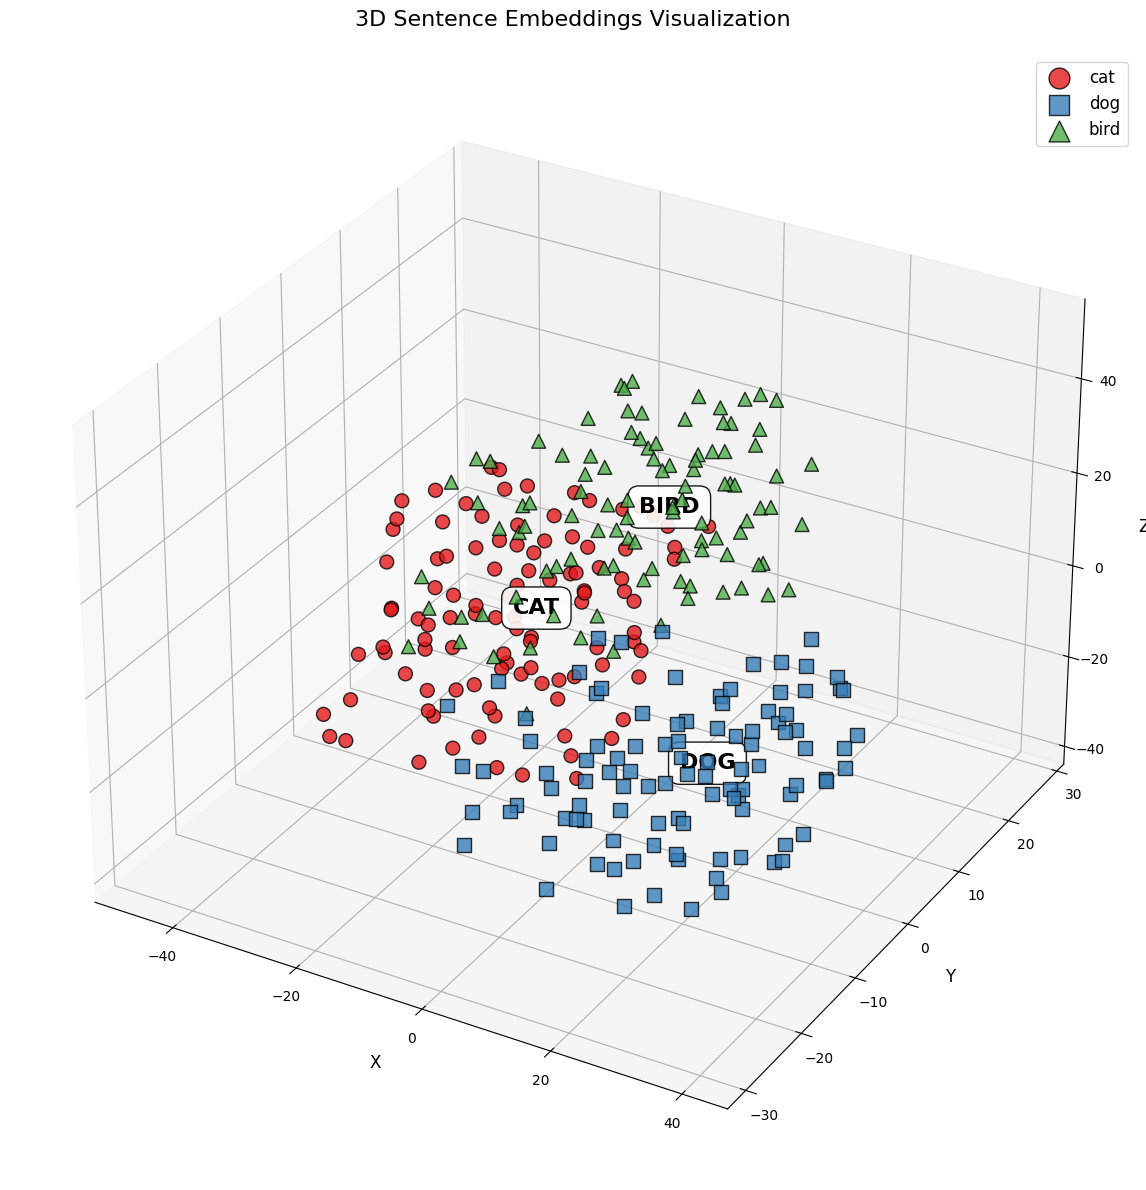

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Load a sentence transformer model
try:
    model = SentenceTransformer("embeddings_model_all_minilm")
    print("Loaded custom model")
except:
    model = SentenceTransformer('all-MiniLM-L6-v2')
    print("Loaded default model: all-MiniLM-L6-v2")

# Create animal categories with unique examples
animal_categories = {
    "cat": [
        "A cat is sleeping on the windowsill.",
        "The cat purrs contentedly on my lap.",
        "My cat chases the red laser pointer.",
        "The kitten plays with a ball of yarn.",
        "Our cat scratches the furniture.",
        "The cat stalks birds through the window.",
        "My cat loves catnip toys.",
        "The cat grooms itself meticulously.",
        "A stray cat wanders the neighborhood.",
        "The cat climbs the curtains.",
        "My cat hides under the bed.",
        "The cat watches fish in the aquarium.",
        "Our cat brings us dead mice.",
        "The cat stretches in the sunbeam.",
        "My cat meows for attention.",
        "The cat sharpens its claws.",
        "Our cat sleeps in cardboard boxes.",
        "The cat drinks from the faucet.",
        "My cat hunts bugs at night.",
        "The cat jumps on countertops.",
    "The cat naps in the laundry basket.",
        "My cat knocks items off shelves.",
        "The cat leaves fur on the couch.",
        "Our cat chases its own tail.",
        "The cat sits in empty boxes.",
        "My cat follows me everywhere.",
        "The cat rubs against legs.",
        "Our cat hisses at strangers.",
        "The cat prowls at midnight.",
        "My cat catches moths.",
        "The cat lounges on windowsills.",
        "Our cat scratches the door.",
        "The cat bats at string toys.",
        "My cat pounces on feet.",
        "The cat licks plastic bags.",
        "Our cat races through halls.",
        "The cat demands breakfast.",
        "My cat attacks shoelaces.",
        "The cat marks its territory.",
        "Our cat grooms other cats.",
        "The cat sneaks food scraps.",
        "My cat sleeps on keyboards.",
        "The cat explores cupboards.",
        "Our cat watches birds outside.",
        "The cat kneads soft blankets.",
        "My cat chirps at birds.",
        "The cat climbs cat trees.",
        "Our cat naps in sinks.",
        "The cat plays with shadows.",
        "My cat hunts toy mice.",
        "The cat scratches posts.",
        "Our cat purrs while eating.",
        "The cat grooms its whiskers.",
        "My cat attacks ankles.",
        "The cat sits on papers.",
        "Our cat investigates bags.",
        "The cat stalks squirrels.",
        "My cat begs for treats.",
        "The cat jumps high walls.",
        "Our cat naps in sunbeams.",
        "The cat plays with water.",
        "My cat catches spiders.",
        "The cat climbs screens.",
        "Our cat watches TV.",
        "The cat hides treats.",
        "My cat attacks plants.",
        "The cat runs from vacuums.",
        "Our cat scratches carpets.",
        "The cat meows at birds.",
        "My cat opens cabinets.",
        "The cat tips water bowls.",
        "Our cat ambushes visitors.",
        "The cat shreds paper.",
        "My cat wrestles toys.",
        "The cat patrols windows.",
        "Our cat ignores commands.",
        "The cat steals food.",
        "My cat climbs bookshelves.",
        "The cat attacks reflections.",
        "Our cat leaves pawprints.",
        "The cat hunts shadows.",
        "My cat scratches walls.",
        "The cat licks plastic.",
        "Our cat sleeps spread-eagle.",
        "The cat chases lasers.",
        "My cat attacks toes.",
        "The cat explores boxes.",
        "Our cat demands attention.",
        "The cat plays fetch.",
        "My cat watches fish.",
        "The cat climbs doors.",
        "Our cat hunts insects.",
        "The cat naps on laps.",
        "My cat attacks yarn.",
        "The cat drinks rainwater.",
        "Our cat catches flies.",
        "The cat explores bags.",
        "My cat sleeps belly-up.",
        "The cat chases toys.",
        "Our cat scratches wood.",
        "The cat hunts lizards.",
        "My cat plays hide-seek.",
        "The cat watches cars.",
        "Our cat climbs trees."    ],
    
    "dog": [
        "The dog fetches the tennis ball.",
        "My dog wags its tail excitedly.",
        "The puppy chews on slippers.",
        "Our dog guards the house.",
        "The dog digs holes in the yard.",
        "My dog rolls in the grass.",
        "The dog begs for table scraps.",
        "Our dog herds the sheep.",
        "The dog catches frisbees.",
        "My dog pulls on the leash.",
        "The dog swims in the lake.",
        "Our dog barks at squirrels.",
        "The dog chases its tail.",
        "My dog learns new tricks.",
        "The dog sniffs other dogs.",
        "Our dog rides in the car.",
        "The dog plays tug of war.",
        "My dog retrieves ducks.",
        "The dog tracks scents.",
        "Our dog jumps through hoops.",
        "The dog howls at sirens.",
        "My dog catches treats.",
        "The dog patrols the yard.",
        "Our dog follows commands.",
        "The dog plays with toys.",
        "My dog greets visitors.",
        "The dog chases squirrels.",
        "Our dog digs holes.",
        "The dog fetches sticks.",
        "My dog walks on leash.",
        "The dog jumps fences.",
        "Our dog carries bones.",
        "The dog marks territory.",
        "My dog learns tricks.",
        "The dog herds sheep.",
        "Our dog guards home.",
        "The dog catches balls.",
        "My dog runs fast.",
        "The dog swims lakes.",
        "Our dog tracks scents.",
        "The dog shakes hands.",
        "My dog rolls over.",
        "The dog plays dead.",
        "Our dog sits pretty.",
        "The dog jumps high.",
        "My dog stays down.",
        "The dog comes here.",
        "Our dog heels well.",
        "The dog speaks loud.",
        "My dog crawls low.",
        "The dog stands guard.",
        "Our dog walks heel.",
        "The dog finds toys.",
        "My dog carries bags.",
        "The dog pulls sleds.",
        "Our dog rescues people.",
        "The dog sniffs trails.",
        "My dog hunts birds.",
        "The dog hides bones.",
        "Our dog chases cats.",
        "The dog jumps puddles.",
        "My dog climbs rocks.",
        "The dog crosses streams.",
        "Our dog leads blind.",
        "The dog detects drugs.",
        "My dog finds lost.",
        "The dog helps police.",
        "Our dog guides sheep.",
        "The dog catches discs.",
        "My dog jumps hurdles.",
        "The dog runs agility.",
        "Our dog walks tightrope.",
        "The dog balances balls.",
        "My dog dances well.",
        "The dog counts numbers.",
        "Our dog solves puzzles.",
        "The dog opens doors.",
        "My dog carries mail.",
        "The dog finds keys.",
        "Our dog alerts danger.",
        "The dog saves lives.",
        "My dog comforts sick.",
        "The dog helps therapy.",
        "Our dog visits hospitals.",
        "The dog serves military.",
        "My dog guards livestock.",
        "The dog hunts truffles.",
        "Our dog finds bombs.",
        "The dog rescues swimmers.",
        "My dog helps farmers.",
        "The dog guides blind.",
        "Our dog protects children.",
        "The dog finds missing.",
        "My dog assists disabled.",
        "The dog performs shows.",
        "Our dog wins races.",
        "The dog catches rabbits.",
        "My dog herds cattle.",
        "The dog finds drugs.",
        "Our dog catches mice.",
        "The dog guards sheep.",
        "My dog helps hunters.",
        "The dog finds lost."
    ],
    
    "bird": [
        "The bird soars through clouds.",
        "My parrot mimics speech.",
        "The eagle hunts for prey.",
        "Our canary sings sweetly.",
        "The hawk circles overhead.",
        "My budgie plays with bells.",
        "The owl hunts at night.",
        "Our birds flock together.",
        "The penguin waddles along.",
        "My dove coos softly.",
        "The hummingbird hovers.",
        "Our peacock displays feathers.",
        "The woodpecker drills trees.",
        "My finch eats seeds.",
        "The crow solves puzzles.",
        "Our duck swims in ponds.",
        "The flamingo stands tall.",
        "My parakeet chatters.",
        "The falcon dives fast.",
        "Our robin builds nests.",
        "The bird builds nests.",
        "My bird mimics sounds.",
        "The bird catches insects.",
        "Our bird spreads wings.",
        "The bird feeds chicks.",
        "My bird preens feathers.",
        "The bird migrates south.",
        "Our bird bathes daily.",
        "The bird gathers twigs.",
        "My bird cracks seeds.",
        "The bird drinks nectar.",
        "Our bird glides gracefully.",
        "The bird dives swiftly.",
        "My bird perches high.",
        "The bird calls loudly.",
        "Our bird flies loops.",
        "The bird catches fish.",
        "My bird eats berries.",
        "The bird swoops low.",
        "Our bird nests high.",
        "The bird catches worms.",
        "My bird sings dawn.",
        "The bird soars thermals.",
        "Our bird courts mates.",
        "The bird defends territory.",
        "My bird weaves nests.",
        "The bird feeds young.",
        "Our bird displays plumage.",
        "The bird hunts mice.",
        "My bird pecks wood.",
        "The bird stores food.",
        "Our bird molts feathers.",
        "The bird dances mating.",
        "My bird taps glass.",
        "The bird raids crops.",
        "Our bird follows plows.",
        "The bird catches snakes.",
        "My bird eats fruits.",
        "The bird drinks dew.",
        "Our bird scratches dirt.",
        "The bird wades shallow.",
        "My bird dives deep.",
        "The bird floats surface.",
        "Our bird rides wind.",
        "The bird hovers still.",
        "My bird probes mud.",
        "The bird spears fish.",
        "Our bird raids nests.",
        "The bird cracks nuts.",
        "My bird stores seeds.",
        "The bird builds dams.",
        "Our bird drills holes.",
        "The bird catches flies.",
        "My bird eats nectar.",
        "The bird hunts night.",
        "Our bird calls morning.",
        "The bird fights rivals.",
        "My bird feeds young.",
        "The bird guards nest.",
        "Our bird teaches flight.",
        "The bird shows colors.",
        "My bird finds food.",
        "The bird marks bounds.",
        "Our bird warns danger.",
        "The bird leads flock.",
        "My bird follows group.",
        "The bird rides currents.",
        "Our bird catches bugs.",
        "The bird feeds babies.",
        "My bird cleans nest.",
        "The bird finds mate.",
        "Our bird builds home.",
        "The bird learns songs.",
        "My bird watches sky.",
        "The bird spots prey.",
        "Our bird escapes hawks.",
        "The bird finds shelter.",
        "My bird gathers moss.",
        "The bird lines nest.",
        "Our bird raises young.",
        "The bird teaches songs.",
        "My bird shows dance."
    ]
}

# Flatten the data and keep track of categories
all_sentences = []
all_categories = []

# Define markers and colors for each category - using larger, more distinct markers
category_to_marker = {
    "cat": "o",      # circle
    "dog": "s",      # square 
    "bird": "^",     # triangle
    "horse": "D",    # diamond
    "frog": "p",     # pentagon
    "deer": "h",     # hexagon
    "ship": "8",     # octagon
    "airplane": "*", # star
    "automobile": "P", # plus filled
    "truck": "X"     # x filled
}

category_to_color = {
    "cat": "#E41A1C",    # Bright red
    "dog": "#377EB8",    # Bright blue  
    "bird": "#4DAF4A",   # Bright green
    "horse": "#984EA3",  # Purple
    "frog": "#FF7F00",   # Orange
    "deer": "#FFFF33",   # Yellow
    "ship": "#A65628",   # Brown
    "airplane": "#F781BF", # Pink
    "automobile": "#999999", # Gray
    "truck": "#66C2A5"    # Teal
}

# Prepare data
for category, sentences in animal_categories.items():
    for sentence in sentences:
        all_sentences.append(sentence)
        all_categories.append(category)

print(f"Total sentences: {len(all_sentences)}")

# Generate embeddings
print("Generating embeddings...")
embeddings = model.encode(all_sentences, show_progress_bar=True)

# Reduce to 3D using t-SNE
print("Reducing dimensions with t-SNE...")
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
embeddings_3d = tsne.fit_transform(embeddings)

# Create a 3D plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot each category with its marker and color
for category in animal_categories.keys():
    # Get indices for this category
    indices = [i for i, cat in enumerate(all_categories) if cat == category]
    
    # Plot points for this category
    ax.scatter(
        embeddings_3d[indices, 0], 
        embeddings_3d[indices, 1],
        embeddings_3d[indices, 2],
        marker=category_to_marker.get(category, 'o'),
        c=category_to_color.get(category, 'blue'),
        s=100,  # Larger point size
        alpha=0.8,  # More opaque
        label=category,
        edgecolors='black',  # Black edges for better visibility
        linewidth=1
    )

# Create a legend
ax.legend(fontsize=12, markerscale=1.5, loc='best')

# Calculate centers for each category for labels
for category in animal_categories.keys():
    indices = [i for i, cat in enumerate(all_categories) if cat == category]
    center_x = np.mean(embeddings_3d[indices, 0])
    center_y = np.mean(embeddings_3d[indices, 1])
    center_z = np.mean(embeddings_3d[indices, 2])
    
    # Add label with background
    ax.text(
        center_x, center_y, center_z,
        category.upper(),  # Uppercase for better visibility
        fontsize=16,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", fc='white', ec='black', alpha=0.9)
    )

# Set title and labels
ax.set_title('3D Sentence Embeddings Visualization', fontsize=16, pad=20)
ax.set_xlabel('X', fontsize=12, labelpad=10)
ax.set_ylabel('Y', fontsize=12, labelpad=10)
ax.set_zlabel('Z', fontsize=12, labelpad=10)

# Save the figure
plt.tight_layout()
plt.savefig('dense_animal_embeddings_3d.png', dpi=300, bbox_inches='tight')
print("Saved visualization to 'dense_animal_embeddings_3d.png'")

plt.show()
plt.show()